In [50]:
import pandas as pd
df = pd.read_csv('C:\\Users\\user\\Desktop\\Course\\all_programming file\\diabetes2.csv')

In [5]:
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier    
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
import sklearn.preprocessing
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(df['Outcome'])
Q = df[['BMI','Glucose']]
K = label_encoder.transform(df['Outcome'])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(Q, K ,test_size = 0.2, random_state = 53)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.7922077922077922


In [10]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [11]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
dt = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=0.0000001, random_state = 1)
dt.fit(X_train,y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf = dt)

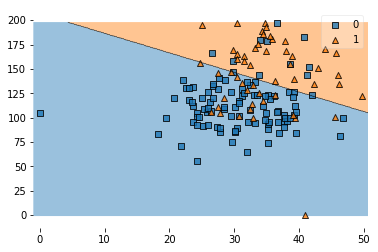

In [12]:
from sklearn.linear_model import  LogisticRegression
reg = LogisticRegression(C = 0.01)
reg.fit(X_train,y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf = reg)

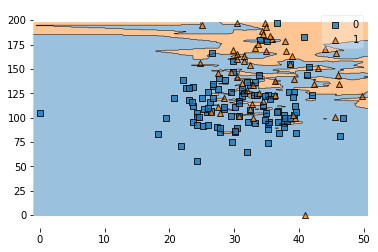

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf = knn)

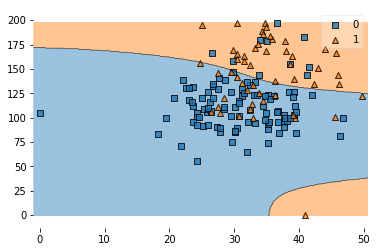

In [14]:
from sklearn.svm import SVC
svm = SVC(C = 10, gamma = 0.001)
svm.fit(X_train,y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf = svm)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(alpha = 0.01, loss = 'hinge')
sgdc.fit(X_train,y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf = sgdc)

In [16]:
from sklearn.metrics import accuracy_score
X = df.iloc[:,0:8]
y = df.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 53)
de_entropy = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 1)
de_entropy.fit(X_train, y_train)
y_pred = de_entropy.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.7402597402597403


In [17]:
socre = accuracy_score(y_test, y_pred)
print(score)

0.7402597402597403


In [18]:
df_gini = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 0.11, random_state=1)
df_gini.fit(X_train, y_train)
y_pred = df_gini.predict(X_test)
socre = accuracy_score(y_test, y_pred)
print(score)

0.7402597402597403


In [19]:
from sklearn.metrics import mean_squared_error as MSE

mse = MSE(y_test, y_pred)
print(mse**(1/2))

0.48349377841522817


In [20]:
from sklearn.model_selection import cross_val_score 
MSE_CV_scores =  cross_val_score(df_gini, X_train, y_train, cv=10, 
                       scoring='accuracy',
                       n_jobs=-1)

print(MSE_CV_scores.mean())

0.7084611316763617


In [21]:
from sklearn.neighbors import KNeighborsClassifier
SEED = 1

lr = LogisticRegression(random_state = SEED)
dt = DecisionTreeClassifier(min_samples_leaf = 0.13, random_state = SEED)
knn = KNeighborsClassifier(n_neighbors = 27)

classifier = [('LogisticRegression',lr),('KNN',knn),('DecisionTreeClassifier',dt)]

for clf_name, clf in classifier:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(clf_name,score)

LogisticRegression 0.7857142857142857
KNN 0.7857142857142857
DecisionTreeClassifier 0.7662337662337663


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = classifier)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(score)




0.7922077922077922


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
y_all_pred = vc.predict(X)
score = accuracy_score(y,y_all_pred)
print(score)

0.7682291666666666


In [24]:
y_all_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
from sklearn.ensemble import BaggingClassifier

df = DecisionTreeClassifier(max_depth=5 , min_samples_leaf = 0.1 ,random_state = 1)
bc = BaggingClassifier(base_estimator =df, n_estimators = 50, oob_score = True, random_state = 1)
                                                                                                
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.7922077922077922


In [27]:
acc_oob = bc.oob_score_
acc_oob

0.752442996742671

In [28]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 25, 
            random_state=2)
            
   
rf.fit (X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [29]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
score = MSE(y_test, y_pred)**(1/2)
print(score)

0.4095578864307979


In [30]:
y_pred = rf.predict(X)
score = MSE(y,y_pred)**(1/2)
score

0.23150098991868984

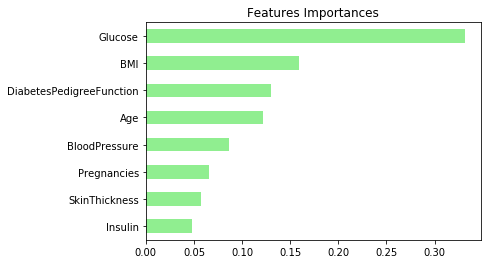

In [31]:
import matplotlib.pyplot as plt
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show() 

In [32]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 150, random_state = 1)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [33]:
score = MSE(y_test,y_pred)**(1/2)
print(score)

0.515978455203089


In [34]:
y_pred_proba = ada.predict_proba(X_test)[:,1]
y_pred_proba

array([0.08565737, 0.31535217, 0.46701693, 0.04656846, 0.35771738,
       0.49450904, 0.67822723, 0.64704297, 0.5266447 , 0.62685214,
       0.38727805, 0.44465321, 0.82409299, 0.52319599, 0.45095985,
       0.38998868, 0.09769819, 0.05844045, 0.36778409, 0.42434128,
       0.62635293, 0.79948613, 0.6473854 , 0.31730512, 0.06798947,
       0.67533247, 0.33498528, 0.33731062, 0.27738349, 0.41599209,
       0.21676886, 0.78742438, 0.5267644 , 0.63747564, 0.84321159,
       0.01532382, 0.28637526, 0.11580226, 0.74748134, 0.21793814,
       0.52117916, 0.70202043, 0.74021765, 0.34070333, 0.66583996,
       0.59243378, 0.57958805, 0.07873137, 0.32472252, 0.14969619,
       0.61981468, 0.39913971, 0.06328664, 0.07067695, 0.45211896,
       0.72569447, 0.13694592, 0.73748513, 0.08498965, 0.91208582,
       0.06522887, 0.08287965, 0.44462126, 0.58262021, 0.07852653,
       0.71949853, 0.28264672, 0.85587838, 0.5109576 , 0.35424881,
       0.44529148, 0.7161404 , 0.56993334, 0.01555983, 0.52784

In [35]:
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.81


<Figure size 432x288 with 0 Axes>

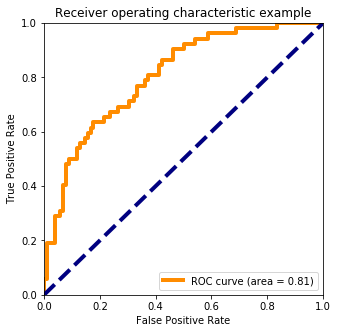

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 4 
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

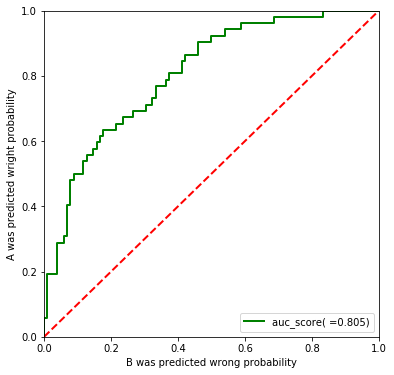

In [37]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
auc_score = auc(fpr,tpr)

plt.figure()
plt.figure(figsize = (6,6))
lw = 2
plt.plot(fpr,tpr,lw = lw, color = 'green', label = 'auc_score( =%0.3f)'% auc_score)
plt.plot([0,1],[0,1], lw = lw, color = 'red', linestyle = '--')
plt.xlim([0.00,1.00])
plt.ylim([0.00,1.00])
plt.xlabel('B was predicted wrong probability')
plt.ylabel('A was predicted wright probability')
plt.legend(loc = 'lower right')
plt.show()

In [38]:
score = accuracy_score(y_test,y_pred)
print(score)


0.7337662337662337


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

sgbr = GradientBoostingRegressor(subsample = 0.9,
                                  max_depth = 4,
                                  max_features = 0.75,
                                  n_estimators = 200,
                                 random_state = 2)

In [ ]:
from sklearn.ensemble import GradientBoosting

In [40]:
sgbr.fit(X_train,y_train)
y_pred = sgbr.predict(X_test)
score = MSE(y_test,y_pred)**(1/2)
print(score)

0.42432032382798296


In [41]:
from sklearn.model_selection import GridSearchCV

params_dt = { 'max_depth':[3,4,5],
               'min_samples_leaf':[0.12,0.14,0.16]}

grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                        scoring = 'roc_auc',
                         n_jobs = -1,
                         cv = 5)

In [42]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [0.12, 0.14, 0.16]},
             pre_

In [43]:
best_model = grid_dt.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:,1]
score = MSE(y_test,y_pred_proba)**(1/2)
print(score)

0.4093534152182734


In [44]:
params_rf = { 'n_estimators' : [100,350,500],
              'max_features' : ['log2','auto','sqrt'],
              'min_samples_leaf':[2,10,30] }

In [45]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'neg_mean_squared_error',
                       cv = 3,
                       verbose=1, 
                       n_jobs=-1) 
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [46]:
best_model = grid_rf.best_estimator_


y_pred = best_model.predict(X_test)


rmse_test = MSE(y_test,y_pred)**(1/2)

In [47]:
rmse_test

0.4037552230023853

In [51]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.shape

(768, 9)

In [53]:
df.loc['768'] = [0,130,70,30,0,21.2,0.16,23,00]

In [54]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0
768,0.0,130.0,70.0,30.0,0.0,21.2,0.160,23.0,0.0


In [70]:
tt = df.iloc[0:770,0:8]
y_pred = best_model.predict(tt)
df['y_pred'] = y_pred
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_pred
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.237761
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.155247
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,0.685878
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0,0.033341
768,0.0,130.0,70.0,30.0,0.0,21.2,0.160,23.0,0.0,0.146530


In [75]:
ada.predict(tt)
ada.predict_proba(tt)[768:]

array([[0.80431487, 0.19568513]])